<a href="https://colab.research.google.com/github/WoogiWooks/DLCV_New/blob/main/2_DLCV_%EC%A3%BC%EC%9A%94_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%84%B8%ED%8A%B8_%EB%B0%8F_OpenCV%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_Video_%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **주요 데이터셋**
많은 Detection, Segmentation 모델들이 아래 데이터셋을 기반으로 pretrained됨


* Pascal VOC :
    * 20개의 오브젝트 카테고리 
    * xml 포맷으로 annotation
    * 이미지 1개당 1개의 annotation 파일을 가짐
* MS COCO : 
    * 80개의 오브젝트 카테고리
    * 총 91개의 id가 있지만 Blank 존재로 실제 카테고리 80개로 구성
    * 총 30만개 이미지와 150만개 오브젝트로 구성 
    * json 포맷으로 annotation
    * 모든 이미지들에 대해서 1개의 annotation 파일을 가짐
    * 하나의 json에 이미지 내 모든 오브젝트의 annotation 들어있음
* Google Open Images : 
    * 600개의 오브젝트 카테고리 
    * csv 포맷으로 annotation
    * Size가 매우큼

# **Pascal VOC**
http://host.robots.ox.ac.uk/pascal/VOC/voc2012/

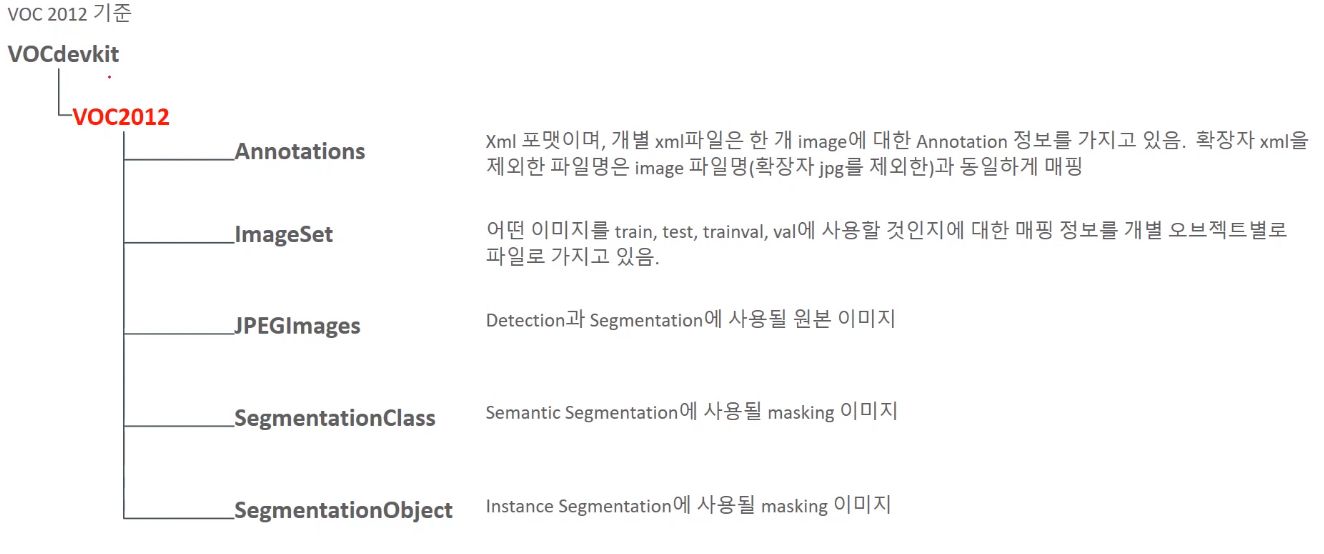

In [ ]:
# ElementTree 이용한 XML 파싱
!pip install lxml

In [ ]:
!cat /content/data/VOCdevkit/VOC2012/Annotations/2007_000032.xml

<annotation>
	<folder>VOC2012</folder>
	<filename>2007_000032.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
	</source>
	<size>
		<width>500</width>
		<height>281</height>
		<depth>3</depth>
	</size>
	<segmented>1</segmented>
	<object>
		<name>aeroplane</name>
		<pose>Frontal</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>104</xmin>
			<ymin>78</ymin>
			<xmax>375</xmax>
			<ymax>183</ymax>
		</bndbox>
	</object>
	<object>
		<name>aeroplane</name>
		<pose>Left</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>133</xmin>
			<ymin>88</ymin>
			<xmax>197</xmax>
			<ymax>123</ymax>
		</bndbox>
	</object>
	<object>
		<name>person</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>195</xmin>
			<ymin>180</ymin>
			<xmax>213</xmax>
			<ymax>229</ymax>
		</bndbox>
	</object>
	<object>
		<name>p

In [ ]:
# pascal voc 2012 데이터를 다운로드 후 /content/data 디렉토리에 압축 해제

!mkdir ./data
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar
!tar -xvf VOCtrainval_11-May-2012.tar -C /content/data

In [ ]:
import os
import random

VOC_ROOT_DIR ="/content/data/VOCdevkit/VOC2012/"
ANNO_DIR = os.path.join(VOC_ROOT_DIR, "Annotations")
IMAGE_DIR = os.path.join(VOC_ROOT_DIR, "JPEGImages")

xml_files = os.listdir(ANNO_DIR)
xml_files_2 = os.listdir(IMAGE_DIR)                       
print(xml_files[:5]); print(len(xml_files)); print(len(xml_files_2))

['2010_003864.xml', '2011_004804.xml', '2008_006133.xml', '2008_003713.xml', '2010_005098.xml']
17125
17125


In [ ]:
import xml.etree.ElementTree as ET

xml_file = os.path.join(ANNO_DIR, '2007_000032.xml')

# XML 파일을 Parsing 하여 Element 생성
tree = ET.parse(xml_file)
root = tree.getroot()   # 위 annotation 파일의 맨위 <annotation> 노드가 root이고 그 아래가 자식들

# image 관련 정보는 root의 자식으로 존재
full_image_name = os.path.join(IMAGE_DIR, image_name)
image_name = root.find('filename').text  # root에서 filename이란 노드를 찾고 노드안의 텍스트를 변수에 지정
image_size = root.find('size')
image_width = int(image_size.find('width').text)
image_height = int(image_size.find('height').text)

print(full_image_name)
print(image_name)
print(image_size)
print(image_width)
print(image_height)

 

/content/data/VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg
2007_000032.jpg
<Element 'size' at 0x7f7fc8742a10>
500
281


In [ ]:
objects_list = []
for obj in root.findall('object'):
    # object element의 자식 element에서 bndbox를 찾음. 
    xmlbox = obj.find('bndbox')
    # bndbox element의 자식 element에서 xmin,ymin,xmax,ymax를 찾고 이의 값(text)를 추출 
    x1 = int(xmlbox.find('xmin').text)
    y1 = int(xmlbox.find('ymin').text)
    x2 = int(xmlbox.find('xmax').text)
    y2 = int(xmlbox.find('ymax').text)
    
    bndbox_pos = (x1, y1, x2, y2)
    class_name=obj.find('name').text
    object_dict={'class_name': class_name, 'bndbox_pos':bndbox_pos}
    objects_list.append(object_dict)

print('full_image_name:', full_image_name,'\n', 'image_size:', (image_width, image_height))

for object in objects_list:
    print(object)


full_image_name: /content/data/VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg 
 image_size: (500, 281)
{'class_name': 'aeroplane', 'bndbox_pos': (104, 78, 375, 183)}
{'class_name': 'aeroplane', 'bndbox_pos': (133, 88, 197, 123)}
{'class_name': 'person', 'bndbox_pos': (195, 180, 213, 229)}
{'class_name': 'person', 'bndbox_pos': (26, 189, 44, 238)}


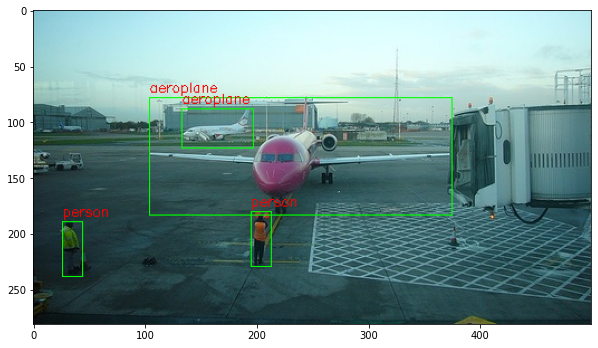

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread(full_image_name)
# opencv의 rectangle()는 인자로 들어온 이미지 배열에 그대로 사각형을 그려주므로 별도의 이미지 배열에 그림 작업 수행. 
draw_img = img.copy()
# OpenCV는 RGB가 아니라 BGR이므로 빨간색은 (0, 0, 255)
green_color=(0, 255, 0)
red_color=(0, 0, 255)

# 파일내에 있는 모든 object Element를 찾음.
objects_list = []
for obj in root.findall('object'):
    xmlbox = obj.find('bndbox')
    
    left = int(xmlbox.find('xmin').text)
    top = int(xmlbox.find('ymin').text)
    right = int(xmlbox.find('xmax').text)
    bottom = int(xmlbox.find('ymax').text)
    
    class_name=obj.find('name').text
    
    # draw_img 배열의 좌상단 우하단 좌표에 녹색으로 box 표시 
    cv2.rectangle(draw_img, (left, top), (right, bottom), color=green_color, thickness=1)
    # draw_img 배열의 좌상단 좌표에 빨간색으로 클래스명 표시
    cv2.putText(draw_img, class_name, (left, top - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, thickness=1)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)

# **MS COCO**

https://cocodataset.org/#download

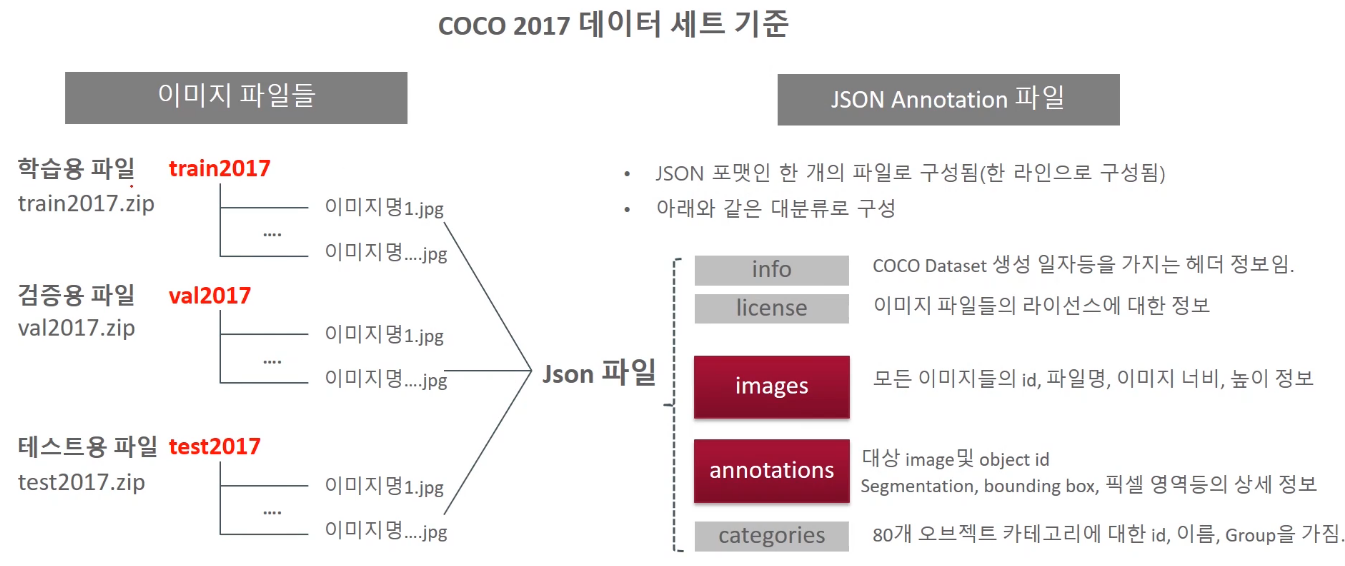

# **OpenCV 통한 Video 처리**

* 동영상을 개별 Frame으로 나누어 하나씩 읽어들임

In [ ]:
!mkdir ./data
!wget -O /content/data/Night_Day_Chase.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true

In [ ]:
import cv2

# 읽어들일 경로
# 저장할 경로
# linux에서 video output의 확장자는 반드시 avi 로 설정 필요 
video_input_path = '/content/data/Night_Day_Chase.mp4'
video_output_path = '/content/data/Night_Day_Chase_out.mp4'

# cv2.VideoCapture를 통해 읽어들일 경로의 비디오 읽기
cap = cv2.VideoCapture(video_input_path)

# 비디오의 총 프레임 갯수
# 불러들인 비디오.get(cv2.CAP_PROP_FRAME_COUNT)
frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

#####################################################
# Codec은 *'XVID'로 설정. 
codec = cv2.VideoWriter_fourcc(*'XVID')

# 비디오의 좌우 넓이 불러들이기
# 불러들인 비디오.get(cv2.CAP_PROP_FRAME_WIDTH)
# 불러들인 비디오.get(cv2.CAP_PROP_FRAME_HEIGHT)
vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))) #(200, 400)

# 비디오의 FPS 불러들이기
# 불러들인 비디오.get(cv2.CAP_PROP_FPS)
vid_fps = cap.get(cv2.CAP_PROP_FPS )


# 저장 경로, 코덱, 프레임크기, FPS 설정해준 것으로 저장하기
vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size) 
#####################################################

print('총 Frame 갯수:', frame_cnt, 'FPS:', round(vid_fps), 'Frame 크기:', vid_size)

총 Frame 갯수: 1383 FPS: 28 Frame 크기: (1216, 516)


In [ ]:
# 불러들인 비디오 다루기
# 위에서 cap과 vid_writer 선언

import time
green_color=(0, 255, 0)
red_color=(0, 0, 255)
start = time.time()
index=0


while True:
    hasFrame, img_frame = cap.read()   # cap.read로 불러오기  # hasFrame: 다음프레임이 존재하는지 여부  # img_frame: 읽어들인 프레임
    if not hasFrame:
        print('더 이상 처리할 frame이 없습니다.')
        break
    index += 1
    print('frame :', index, '처리 완료')
    
    cv2.rectangle(img_frame, (300, 100, 800, 400), color=green_color, thickness=2)
    caption = "frame:{}".format(index)
    cv2.putText(img_frame, caption, (300, 95), cv2.FONT_HERSHEY_SIMPLEX, 1.5, red_color, 1)
    
    vid_writer.write(img_frame)    # 프레임 저장하고 다음 프레임으로 넘어감

print('write 완료 시간:', round(time.time()-start,4))

# 비디오 저장
vid_writer.release()  
cap.release()         